In [58]:
# 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
import FinanceDataReader as web

from datetime import date, timedelta
# 차트 시각화 지원
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (24,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams["axes.grid"] = True

import datetime
# 수치 데이터 조작 배열 데이터 핸들링
import numpy as np

import urllib.parse


In [59]:
# !pip install -U finance-datareader

In [60]:
%matplotlib inline

plt.figure(figsize=(15,9))

today = date.today()

startday = date(2021,1,1)

endday = today
# endday = date(2021,5,16)

SEC = web.DataReader("005930", startday, endday)

SEC.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


<Figure size 1080x648 with 0 Axes>

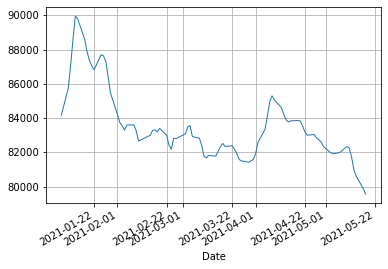

In [61]:
# 이동집계
SEC['MA1'] = np.round(SEC["Close"].rolling(window=5,center=False).mean(),2)
SEC['MA2'] = np.round(SEC["Close"].rolling(window=20,center=False).mean(),2)
SEC['MA_diff'] = SEC['MA1'] - SEC['MA2']
# SEC['MA1'].tolist()
SEC.head(50)
SEC['MA1'].plot()

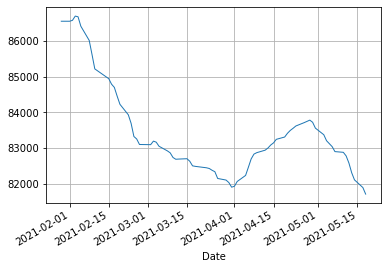

In [62]:
SEC['MA2'].plot()

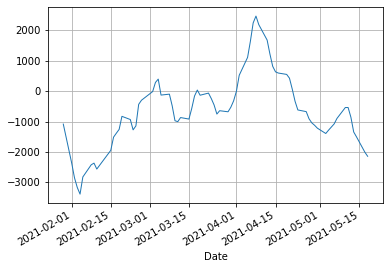

In [57]:
SEC['MA_diff'].plot()

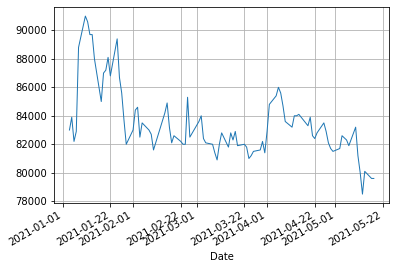

In [63]:
SEC['Close'].plot()

In [68]:
# volume(거래량)이 0이 아닌것만(예외처리) sec에 대입
SEC = SEC[SEC['Volume'] != 0]

# SEC['Close'].head()
SEC.tail()

,Open,High,Low,Close,Volume,Change,MA1,MA2,MA_diff
Date,,,,,,,,,
2021-05-12,80800,81200,79800,80000,35812268,-0.014778,81720.0,82580.0,-860.0
2021-05-13,78900,79600,78400,78500,31490096,-0.018750,80960.0,82305.0,-1345.0
2021-05-14,79000,80300,78900,80100,16450920,0.020382,80600.0,82105.0,-1505.0
2021-05-17,80800,80900,79200,79600,17740855,-0.006242,79880.0,81890.0,-2010.0
2021-05-18,79600,80000,79100,79600,12383064,0.000000,79560.0,81705.0,-2145.0


In [54]:
# 1 씩 shift
# 아래에서 적용하면 close(종가) 데이터를 한칸씩 위로 민다 그래서 다음날(미래) 종가
SEC['Close'].shift(1).head()

Date
2021-04-16         NaN
2021-04-19    343500.0
2021-04-20    354000.0
2021-04-21    355500.0
2021-04-22    351000.0
Name: Close, dtype: float64

In [55]:
# 수익률 계산
# 내용은 문자이므로 실수로 형변환 해야한다.
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))

SEC

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2021-04-16,346000,347500,339000,343500,301914,-0.007225,NaN
2021-04-19,343500,354000,341000,354000,382725,0.030568,0.030110
2021-04-20,352000,356000,350500,355500,339391,0.004237,0.004228
2021-04-21,350000,355000,346000,351000,434931,-0.012658,-0.012739
2021-04-22,352500,359000,351000,353000,443997,0.005698,0.005682
2021-04-23,350500,355500,347500,355500,326287,0.007082,0.007057
2021-04-26,355500,363000,352000,362500,475237,0.019691,0.019499
2021-04-27,366000,383000,365500,377500,734422,0.041379,0.040546
2021-04-28,380000,381500,369500,372500,545333,-0.013245,-0.013334


In [56]:
futurePrice = SEC['Close'].astype(float)
prePrice = SEC['Close'].shift(1).astype(float)

SEC['Rate'] = ((futurePrice - prePrice) / prePrice)
SEC

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2021-04-16,346000,347500,339000,343500,301914,-0.007225,NaN
2021-04-19,343500,354000,341000,354000,382725,0.030568,0.030568
2021-04-20,352000,356000,350500,355500,339391,0.004237,0.004237
2021-04-21,350000,355000,346000,351000,434931,-0.012658,-0.012658
2021-04-22,352500,359000,351000,353000,443997,0.005698,0.005698
2021-04-23,350500,355500,347500,355500,326287,0.007082,0.007082
2021-04-26,355500,363000,352000,362500,475237,0.019691,0.019691
2021-04-27,366000,383000,365500,377500,734422,0.041379,0.041379
2021-04-28,380000,381500,369500,372500,545333,-0.013245,-0.013245


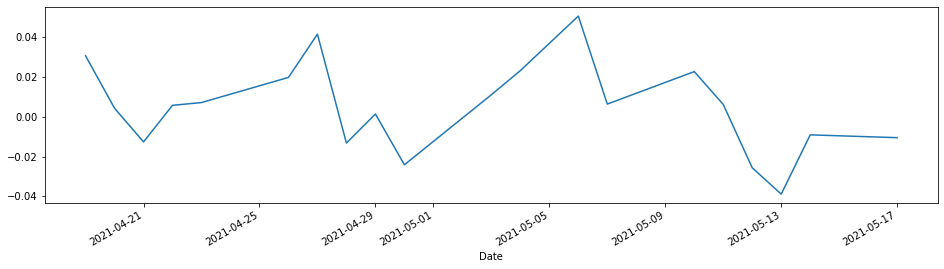

In [57]:
SEC["Rate"].plot(figsize=(16,4))

plt.show()

In [33]:
pwd

'C:\\Users\\SMART-25\\stddev\\주가예측'

In [58]:
# 골든크로스 : 5일선이 20일선을 치고 올라갈때